## **UTS**
**SOAL**

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

In [66]:
import pandas as pd
#membaca data kanker 
data_kp= pd.read_csv('/content/drive/MyDrive/datamining/tugas/dataR2.csv')
#menampilkan 5 data teratas
data_kp.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [64]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
fitur = data_kp[data_kp.columns[:9]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
label = data_kp['Classification']


print(label)

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64


In [14]:
# Import fungsi train_test_split untuk membagi data
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi training set dan test set
# 70% training dan 30% test
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.3)

In [17]:
# banyak data training dan data test
print(X_train.shape)
print(X_test.shape)

(81, 8)
(35, 8)


### **Metode KNN**

KNN adalah algoritma klasifikasi dengan mencari tetangga terdekat dengan memperhatikan kemiripan dan kedekatan dengan data yang lain



In [19]:
#import modul KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier

#import metrics model untuk mengecek akuras 
from sklearn import metrics
#mengecek akurasi jika k=1 sampai k=25
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

scores

# dapat dilihat hasil akurasi tidak begitu baik karena tidak ada akurasi
# yang lebih dari 0.85
# akurasi tertinggi ketika k = 1, 11, 21



{1: 0.7714285714285715,
 2: 0.5714285714285714,
 3: 0.7142857142857143,
 4: 0.6571428571428571,
 5: 0.6857142857142857,
 6: 0.7142857142857143,
 7: 0.7142857142857143,
 8: 0.7428571428571429,
 9: 0.7142857142857143,
 10: 0.7142857142857143,
 11: 0.7714285714285715,
 12: 0.6857142857142857,
 13: 0.6857142857142857,
 14: 0.7142857142857143,
 15: 0.6571428571428571,
 16: 0.6857142857142857,
 17: 0.6857142857142857,
 18: 0.7142857142857143,
 19: 0.7714285714285715,
 20: 0.7142857142857143,
 21: 0.7714285714285715,
 22: 0.7428571428571429,
 23: 0.7428571428571429,
 24: 0.7142857142857143,
 25: 0.7142857142857143}

Text(0, 0.5, 'Testing Accuracy')

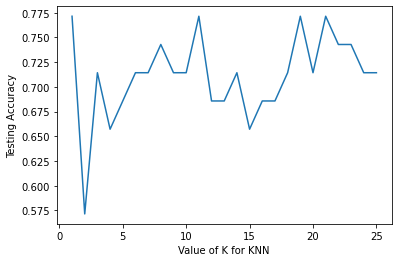

In [20]:
# modul matplotlib untuk melihat akurasi dalam bentuk graph
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [23]:
# set n_neighbors = 1, 11, atau 21 karena dari pengecekan diatas akurasi tertinggi ada pada
# k = 1, 11, dan 21 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(fitur,label)

x_new = [[48,20.500000,70, 3,0.467409,8.8071,9.702400,7.99585,417.114],
         [70,5.500000,60,2,0.467409,8.8071,8.37648,6.99585,300.114]]
y_predict = knn.predict(x_new)

print(label[y_predict[0]])
print(label[y_predict[1]])

1
1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


### **Metode Decision Tree**
Decision tree adalah algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon yang memodelkan kemungkinan hasil, biaya sumber daya, utilitas dan kemungkinan konsekuensi atau resiko. Konsepnya adalah dengan cara menyajikan algoritma dengan pernyataan bersyarat, yang meliputi cabang untuk mewakili langkah-langkah pengambilan keputusan yang dapat mengarah pada hasil yang menguntungkan. 

In [25]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Membuat objek Decision Tree classifer
clf = DecisionTreeClassifier()

# Melatih Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# prediksi test dataset
y_pred = clf.predict(X_test)

print("Akurasi:",metrics.accuracy_score(y_test, y_pred))

Akurasi: 0.7428571428571429


In [ ]:
#implementasi Decision Tree ke dalam bentuk gambar
from sklearn.tree import export_graphviz
export_graphviz(
    y_pred,
    out_file = "cancer_tree.dot",
    feature_names = ['Age',	'BMI',	'Glucose',	'Insulin',	'HOMA',	'Leptin',	'Adiponectin',	'Resistin',	'MCP.1'],
    class_names = [1, 2],
    rounded= True,
    filled =True)

#setelah dijalankan maka akan ada file baru dengan nama iris_tree.dot
#dibagian folder sebelah kiri, kemudian unduh dan gunakan image coverter untuk
#mengubahnya dalam bentuk gambar